In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
dataset = pd.read_csv("./Liver.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


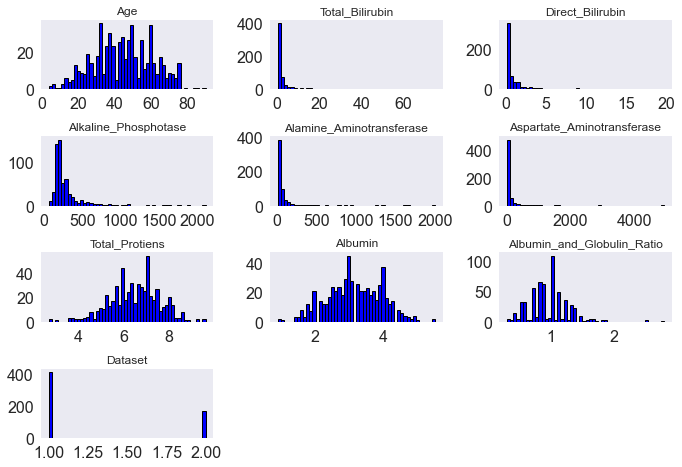

In [4]:
dataset.hist(bins=50, color='blue', edgecolor='black', linewidth=1.0,
           xlabelsize=16, ylabelsize=16, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

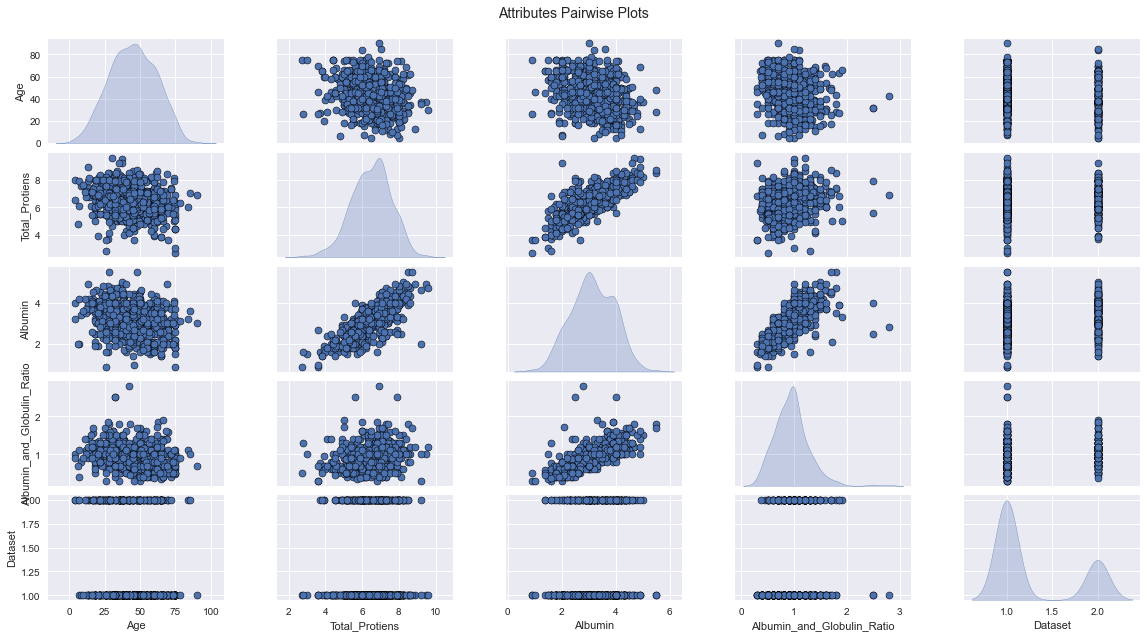

In [5]:

# Pair-wise Scatter Plots
cols = ['Age', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio','Dataset']
pp = sns.pairplot(dataset[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attributes Pairwise Plots', fontsize=14)

In [6]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [8]:
dataset['Gender'].replace('Female',1,inplace=True)
dataset['Gender'].replace('Male',0,inplace=True)
dataset.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
dataset.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.243568,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


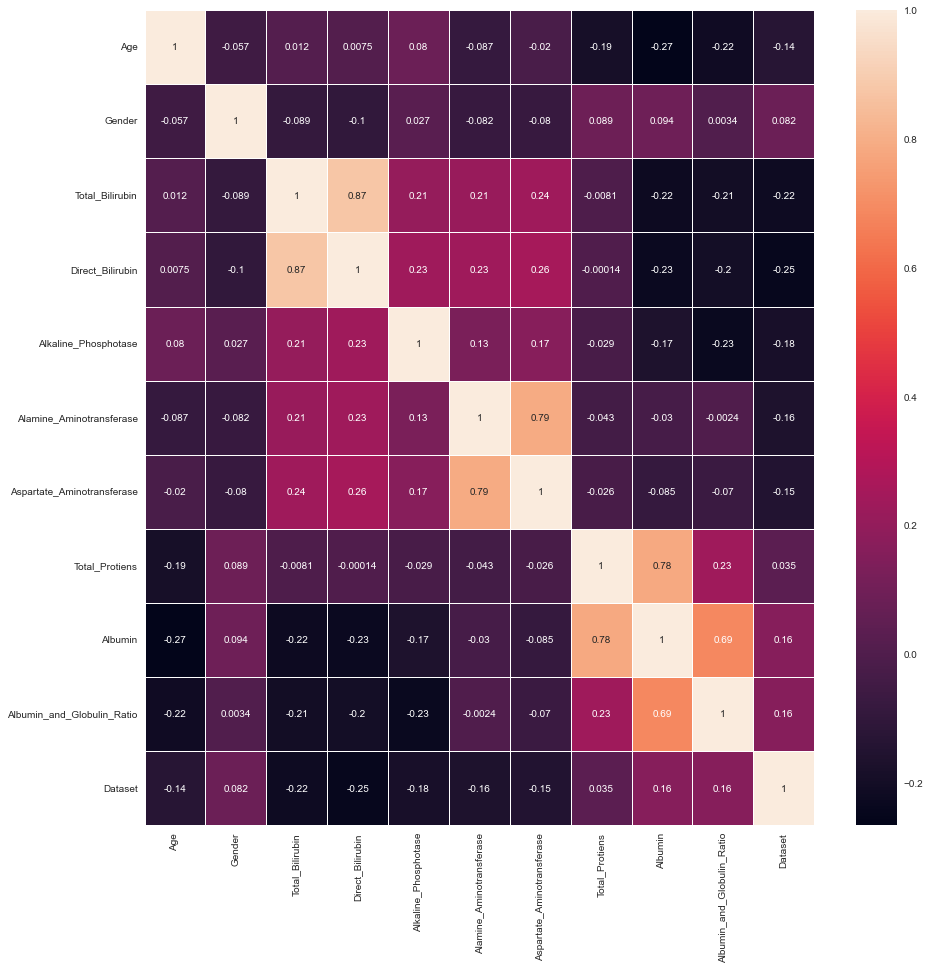

In [10]:
import seaborn as sns
df = dataset.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(df, vmax=1, annot=True, linewidths=.5)
plt.show()


Actually we can remove more than 2 features from this dataset Since
they don't have higher impact on our y value. 

In [11]:
dataset.shape,type(dataset)

((583, 11), pandas.core.frame.DataFrame)

In [12]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [13]:
x.shape,y.shape

((583, 10), (583,))

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

## Using Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(max_iter=1000)
Lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [16]:
y_pred = Lr.predict(x_test)

from sklearn.metrics import accuracy_score
LR_accuracy = accuracy_score(y_test,y_pred)
LR_accuracy

0.7054794520547946

## Using Decision Tree 

In [17]:
from sklearn.tree import DecisionTreeClassifier
dT = DecisionTreeClassifier(max_depth=10)


In [18]:
dT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [19]:
dT_pred = dT.predict(x_test)


In [20]:
dT_accuracy = accuracy_score(y_test,dT_pred)
dT_accuracy

0.684931506849315

## support vector machine

In [21]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [22]:
svc_pred = svc.predict(x_test)

In [23]:
svc_accuracy = accuracy_score(y_test,svc_pred)
svc_accuracy

0.7397260273972602